In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.meta_analysis import effectsize_smd, combine_effects
import statsmodels.formula.api as smf

# Load the data from the Excel file
data = pd.read_excel("data/metaanalysis_data.xlsx")

# Display the first few rows of the dataset
data.head()

,Study,Female authors,Male authors,Age (months),N_boys,N_girls,Mean_boys_play_male,SD_boys_play_male,Mean_girls_play_male,SD_girls_play_male,...,Country,Case definition adequate,Representativeness of cases,Selection of controls,Parental opinion,Comparability of both groups,Ascertainment of behaviour,Same ascertainment method for both groups,Non‐response rate,NOS score
0,Alexander & Saenz (2012),2,0,19.50,47,47,438.72,166.08,248.64,161.28,...,0.256,*,*,X,X,*,*,*,X,5
1,Arthur (2014),1,0,19.00,22,18,148.00,105.00,54.00,53.00,...,0.280,*,X,X,X,**,*,*,*,6
2,Berenbaum & Hines (1992),2,0,65.79,18,18,325.25,270.21,135.13,201.72,...,0.252,X,*,*,*,*,*,*,X,6
3,Berenbaum & Snyder (1995),2,0,93.10,19,19,484.21,141.28,202.48,168.14,...,0.252,*,X,*,*,*,*,*,*,7
4,Doering et al (1989),1,3,87.00,15,15,260.10,67.70,98.40,101.30,...,0.141,*,*,*,X,*,*,*,X,6


# Meta-analysis on Toy Preferences

### __(*Note:* This analysis is based on the data from Todd et al., 2017 - "Sex differences in children’s toy preferences: A systematic review, meta‐regression, and meta‐analysis")__

***

### Overview

Meta-analysis is a statistical technique for combining the findings from independent studies. It is often used to assess the effectiveness of healthcare interventions and to derive general conclusions from multiple studies on the same topic.

In this assignment, we analyze data on children's toy preferences, specifically focusing on the differences between boys' and girls' choices of toys. The dataset includes mean times (in seconds) spent playing with toys, sample sizes, standard errors, and additional study characteristics.

***

### Data Summary


In [7]:
# Calculate effect sizes for boys playing with male-typed toys
data['TE_boys_male'], data['seTE_boys_male'] = effectsize_smd(
    data['Mean_boys_play_male'], data['SD_boys_play_male'], data['N_boys'],
    data['Mean_girls_play_male'], data['SD_girls_play_male'], data['N_girls']
)
data['TE_girls_female'], data['seTE_girls_female'] = effectsize_smd(
    data['Mean_girls_play_female'], data['SD_girls_play_female'], data['N_girls'],
    data['Mean_boys_play_female'], data['SD_boys_play_female'], data['N_boys']
)

# Perform meta-analysis for boys playing with male-typed toys
res_boys_male = combine_effects(data['TE_boys_male'], data['seTE_boys_male']**2, method_re='dl')
res_girls_female = combine_effects(data['TE_girls_female'], data['seTE_girls_female']**2, method_re='dl')

res_boys_male_summary = {
    "Combined effect size (random effects)": res_boys_male.effect,
    "95% CI (random)": (res_boys_male.conf_int(alpha=0.05)[0], res_boys_male.conf_int(alpha=0.05)[1])
}

res_girls_female_summary = {
    "Combined effect size (random effects)": res_girls_female.effect,
    "95% CI (random)": (res_girls_female.conf_int(alpha=0.05)[0], res_girls_female.conf_int(alpha=0.05)[1])
}

res_boys_male_summary, res_girls_female_summary

({'Combined effect size (random effects)': 0     1.151674
  1     1.074697
  2     0.779640
  3     1.776137
  4     1.826148
  5     0.846942
  6     0.230962
  7     1.521240
  8     2.711052
  9     0.788885
  10    2.075080
  11    1.335650
  12    0.732469
  13    1.872943
  14    0.795401
  15    1.144973
  16    1.386841
  17    2.520541
  18    0.534008
  19    1.037451
  20    0.582425
  21    0.606175
  22    0.552736
  23    0.168116
  24    0.392880
  25    0.689272
  26    0.528775
  Name: TE_boys_male, dtype: float64,
  '95% CI (random)': (array([0.68127013, 0.72746553]),
   array([0.88949569, 1.18128387]))},
 {'Combined effect size (random effects)': 0     0.825872
  1     1.879824
  2     1.157686
  3     1.284203
  4     1.700141
  5     0.033668
  6    -0.007393
  7     1.644184
  8     0.738816
  9     0.751562
  10    1.800779
  11    0.549922
  12    0.527174
  13    1.170357
  14    1.332520
  15    1.183514
  16    2.371684
  17    1.699846
  18    0.326737
  19 

### Combined Effects

#### Boys Playing with Male-typed Toys

- Number of studies combined: `r len(data)`
- Random effects model: `r res_boys_male_summary["Combined effect size (random effects)"]` [95% CI: `r res_boys_male_summary["95% CI (random)"][0]`, `r res_boys_male_summary["95% CI (random)"][1]`]

#### Girls Playing with Female-typed Toys

- Number of studies combined: `r len(data)`
- Random effects model: `r res_girls_female_summary["Combined effect size (random effects)"]` [95% CI: `r res_girls_female_summary["95% CI (random)"][0]`, `r res_girls_female_summary["95% CI (random)"][1]`]

### Funnel Plot

The funnel plot helps to visualize the distribution of the effect sizes and check for publication bias.


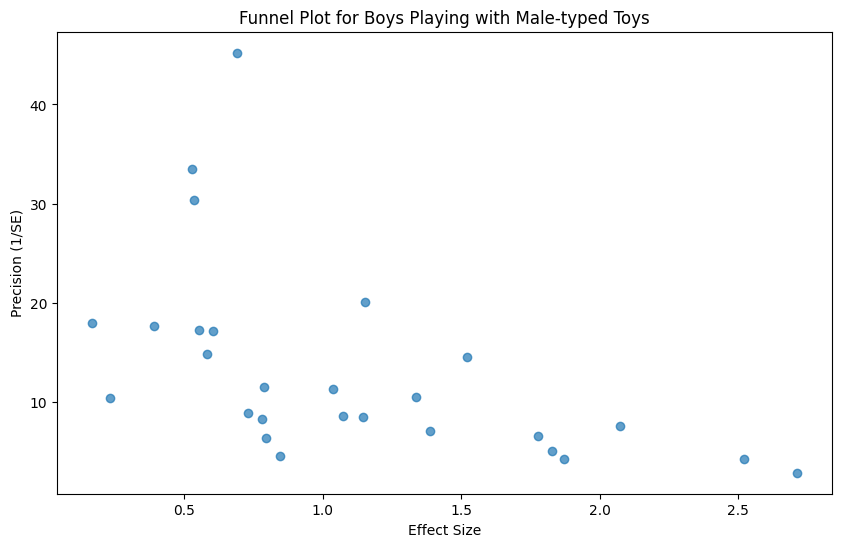

In [8]:
# Create a basic funnel plot for boys playing with male-typed toys
plt.figure(figsize=(10, 6))
plt.scatter(data['TE_boys_male'], 1 / data['seTE_boys_male'], alpha=0.7)
plt.title('Funnel Plot for Boys Playing with Male-typed Toys')
plt.xlabel('Effect Size')
plt.ylabel('Precision (1/SE)')
plt.show()

### Contour-enhanced Funnel Plot

To add more details, we can create a contour-enhanced funnel plot:


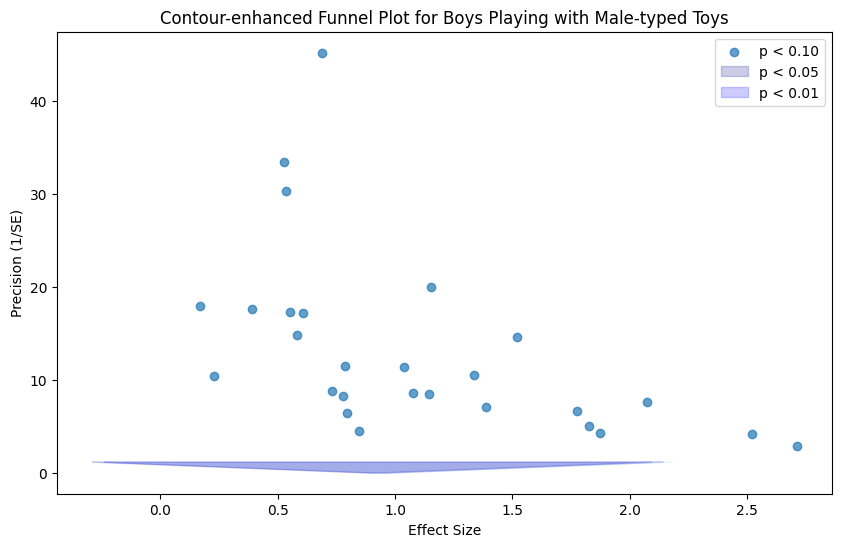

In [9]:
# Add contour-enhanced features to the funnel plot for boys playing with male-typed toys
plt.figure(figsize=(10, 6))
plt.scatter(data['TE_boys_male'], 1 / data['seTE_boys_male'], alpha=0.7)
contour_levels = [0.90, 0.95, 0.99]
contour_colors = ['darkblue', 'blue', 'lightblue']
for level, color in zip(contour_levels, contour_colors):
    plt.fill_betweenx(
        np.arange(0, 1.2, 0.01),
        level - np.arange(0, 1.2, 0.01),
        level + np.arange(0, 1.2, 0.01),
        color=color, alpha=0.2
    )
plt.title('Contour-enhanced Funnel Plot for Boys Playing with Male-typed Toys')
plt.xlabel('Effect Size')
plt.ylabel('Precision (1/SE)')
plt.legend(['p < 0.10', 'p < 0.05', 'p < 0.01'], loc='upper right')
plt.show()

### Checking Methods/Quality Effects

We analyze whether the methods or quality of the studies affect the results using meta-regression.


In [10]:
# Prepare the data for meta-regression
data['Neutral_toys'] = data['Neutral toys'].astype(float)
data['Parent_present'] = data['Parent present'].astype(float)
data['Setting'] = data['Setting'].astype(float)
data['Country'] = data['Country'].astype(float)
data['NOS_score'] = data['NOS score'].astype(float)

meta_reg = smf.ols('TE_boys_male ~ Neutral_toys + Parent_present + Setting + Country + NOS_score', data=data).fit()
meta_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           TE_boys_male   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                 -0.145
Method:                 Least Squares   F-statistic:                    0.3655
Date:                Fri, 31 May 2024   Prob (F-statistic):              0.866
Time:                        19:52:28   Log-Likelihood:                -25.181
No. Observations:                  26   AIC:                             62.36
Df Residuals:                      20   BIC:                             69.91
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.4494      2.176      0.666      0.513      -3.091       5.989
Neutral_toys       0.0724      0.495      0.146      0.885      -0.961       1.106
Parent_present    -0.0933      0.242     -0.386      0.703      -0.597       0.411
Setting            0.2448      0.349      0.702      0.491      -0.482       0.972
Country           -0.5389      2.292     -0.235      0.816      -5.320       4.242
NOS_score         -0.0889      0.242     -0.368      0.717      -0.593       0.415
==============================================================================
Omnibus:                        6.831   Durbin-Watson:                   2.217
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                5.262
Skew:                           1.080   Prob(JB):                       0.0720
Kurtosis:                       3.442   Cond. No.                         152.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Effect of Author Gender

We investigate whether the gender of the authors has any effect on the study outcomes.


In [11]:
# Meta-regression to check the impact of author gender for boys playing with male-typed toys
meta_reg_gender = smf.ols('TE_boys_male ~ Q("Female authors") + Q("Male authors")', data=data).fit()
meta_reg_gender.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           TE_boys_male   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     5.976
Date:                Fri, 31 May 2024   Prob (F-statistic):            0.00783
Time:                        19:52:31   Log-Likelihood:                -21.580
No. Observations:                  27   AIC:                             49.16
Df Residuals:                      24   BIC:                             53.05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.9469      0.336      5.793      0.000       1.253       2.640
Q("Female authors")    -0.3964      0.123     -3.230      0.004      -0.650      -0.143
Q("Male authors")       0.2235      0.105      2.119      0.045       0.006       0.441
==============================================================================
Omnibus:                        5.810   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                4.719
Skew:                           1.023   Prob(JB):                       0.0945
Kurtosis:                       3.100   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Summary

This analysis provided insights into the overall effects of children's toy preferences and explored potential biases and factors affecting the results. The funnel plots and meta-regression analyses are useful tools for assessing the quality and consistency of the findings across different studies.